In [7]:
from datetime import datetime
import pandas as pd
import acquire
import prepare
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = prepare.prep_store()
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,Tuesday,13.84
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,34.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,Tuesday,31.65
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,62.40
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,43.40


# Split the data

<ipython-input-8-65a00336c0ab>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


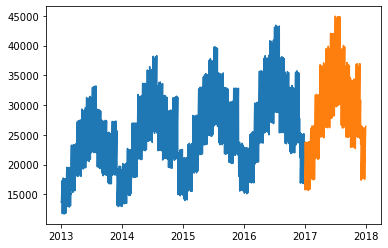

In [8]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_by_date = train.groupby(['sale_date']).sale_amount.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sale_amount.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
plt.show()

In [9]:
train.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,Tuesday,13.84
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,34.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,Tuesday,31.65
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,62.40
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,43.40


In [13]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.84
2013-01-01 00:00:00+00:00    34.40
2013-01-01 00:00:00+00:00    31.65
2013-01-01 00:00:00+00:00    62.40
2013-01-01 00:00:00+00:00    43.40
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

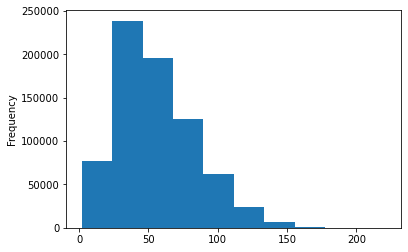

In [14]:
y.plot.hist()

<AxesSubplot:xlabel='sale_date'>

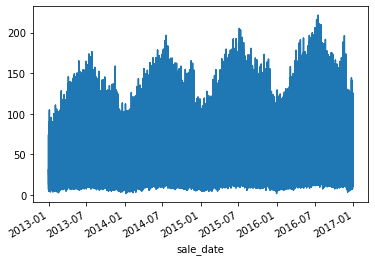

In [16]:
y.plot()

<AxesSubplot:xlabel='sale_date'>

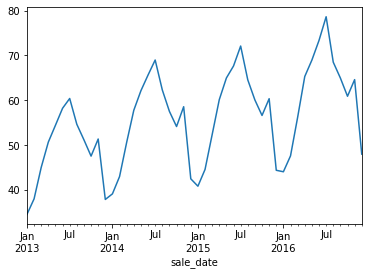

In [15]:
y.resample('M').mean().plot()